In [1]:
import tensorflow_datasets as tfds
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
dataset , info = tfds.load("svhn_cropped" , with_info = True , as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/73257 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.FAG0M8_3.1.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...:   0%|          | 0/26032 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.FAG0M8_3.1.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...:   0%|          | 0/531131 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.FAG0M8_3.1.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.1.0. Subsequent calls will reuse this data.


In [3]:
train_dataset , test_dataset = dataset["train"] , dataset["test"]

In [4]:
def preprocess(image , label):
  image = tf.cast(image , tf.float32)
  image = image/255.0
  label = tf.cast(label , tf.int32)
  label = to_categorical(label , num_classes = 10)
  return image , label

In [5]:
train_dataset = train_dataset.map(preprocess).batch(64)
test_dataset = test_dataset.map(preprocess).batch(63)

In [6]:
for image, label in train_dataset:
  print(image.shape , label.shape)
  print(label[0])
  break

(64, 32, 32, 3) (64, 10)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


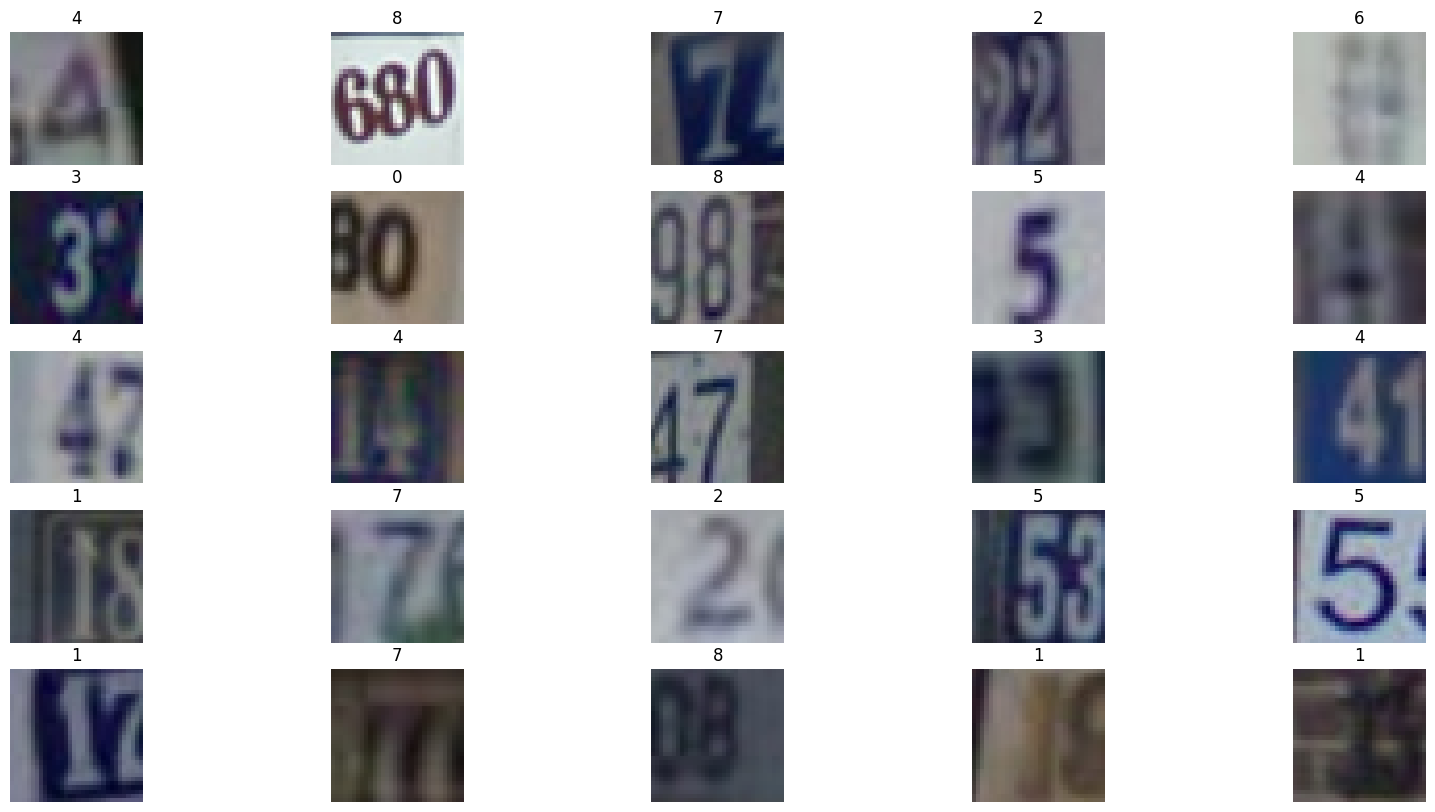

In [7]:
images = []
labels = []
for image,label in train_dataset.take(1):
  images = image.numpy()[:25]
  labels = label.numpy()[:25]

plt.figure(figsize = (20,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(images[i])
  plt.title(np.argmax(labels[i]))
  plt.axis("off")
plt.show()

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape = (32,32,3) , filters = 32 , activation = "relu" , kernel_size = (3,3)),
    keras.layers.Conv2D(32 , activation="relu" , kernel_size = (3,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Conv2D(64 , activation="relu" , kernel_size = (3,3)),
    keras.layers.Conv2D(64 , activation = "relu" , kernel_size = (3,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.GlobalAveragePooling2D(),

    keras.layers.Dense(1024, activation = "relu" ),
    keras.layers.Dense(10 , activation = "softmax")
])

In [12]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,762 (557.66 KB)

 Trainable params: 142,570 (556.91 KB)

 Non-trainable params: 192 (768.00 B)

None


In [14]:
model.compile(loss = keras.losses.CategoricalCrossentropy() , optimizer = keras.optimizers.Adam(learning_rate = 0.0001) , metrics = ["accuracy"])

In [15]:
from keras.callbacks import EarlyStopping

In [16]:
early_stop = EarlyStopping(monitor = "val_loss" , patience = 5 , restore_best_weights = True )

In [18]:
history = model.fit(train_dataset,epochs = 25 , batch_size = 64 , verbose = 2 , shuffle = True , validation_data = (test_dataset) , callbacks = [early_stop])

Epoch 1/25
1145/1145 - 26s - 23ms/step - accuracy: 0.5073 - loss: 1.4873 - val_accuracy: 0.6569 - val_loss: 1.0722
Epoch 2/25
1145/1145 - 34s - 30ms/step - accuracy: 0.7450 - loss: 0.8207 - val_accuracy: 0.7469 - val_loss: 0.8057
Epoch 3/25
1145/1145 - 19s - 17ms/step - accuracy: 0.7984 - loss: 0.6465 - val_accuracy: 0.7736 - val_loss: 0.7211
Epoch 4/25
1145/1145 - 16s - 14ms/step - accuracy: 0.8224 - loss: 0.5684 - val_accuracy: 0.7870 - val_loss: 0.6822
Epoch 5/25
1145/1145 - 21s - 18ms/step - accuracy: 0.8368 - loss: 0.5201 - val_accuracy: 0.8224 - val_loss: 0.5994
Epoch 6/25
1145/1145 - 17s - 14ms/step - accuracy: 0.8473 - loss: 0.4850 - val_accuracy: 0.8266 - val_loss: 0.5697
Epoch 7/25
1145/1145 - 20s - 18ms/step - accuracy: 0.8565 - loss: 0.4575 - val_accuracy: 0.8388 - val_loss: 0.5282
Epoch 8/25
1145/1145 - 15s - 13ms/step - accuracy: 0.8641 - loss: 0.4346 - val_accuracy: 0.8488 - val_loss: 0.5014
Epoch 9/25
1145/1145 - 22s - 19ms/step - accuracy: 0.8711 - loss: 0.4143 - val_a

Text(0.5, 1.0, 'loss')

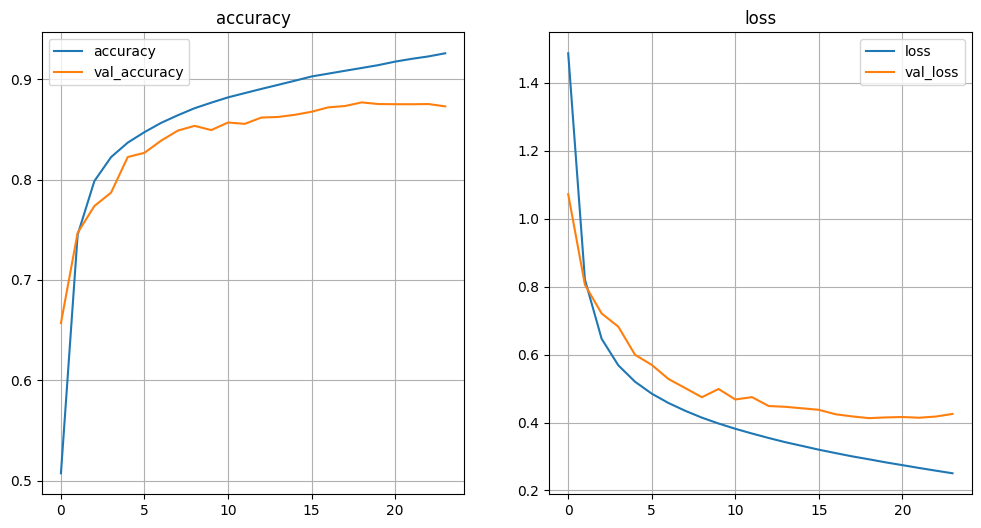

In [19]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"] , label = "accuracy")
plt.plot(history.history["val_accuracy"] , label = "val_accuracy")
plt.legend()
plt.grid()
plt.title("accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"] , label = "loss")
plt.plot(history.history["val_loss"] , label = "val_loss")
plt.legend()
plt.grid()
plt.title("loss")


In [20]:
model.evaluate(test_dataset)

414/414 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8785 - loss: 0.4101


[0.41281870007514954, 0.8768823146820068]

In [51]:
predictions = []
images = []
labels = []
count = 0
for image,label in train_dataset.take(1):
  for i in range(10):
    pred = model.predict(image[i:i+1])
    images.append(image[i:i+1])
    predictions.append(pred)
    labels.append(label[i:i+1])
    count += 1
    if(count == 10):
      break
  if(count == 10):
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [56]:
print(f"Predicted values :   {np.argmax(predictions , axis = 0)} ")
print(f"Real values      :   {np.argmax(labels,axis=0)}")

Predicted values :   [[6 4 3 5 0 8 1 2 7 4]] 
Real values      :   [[6 0 3 5 0 8 4 2 1 0]]


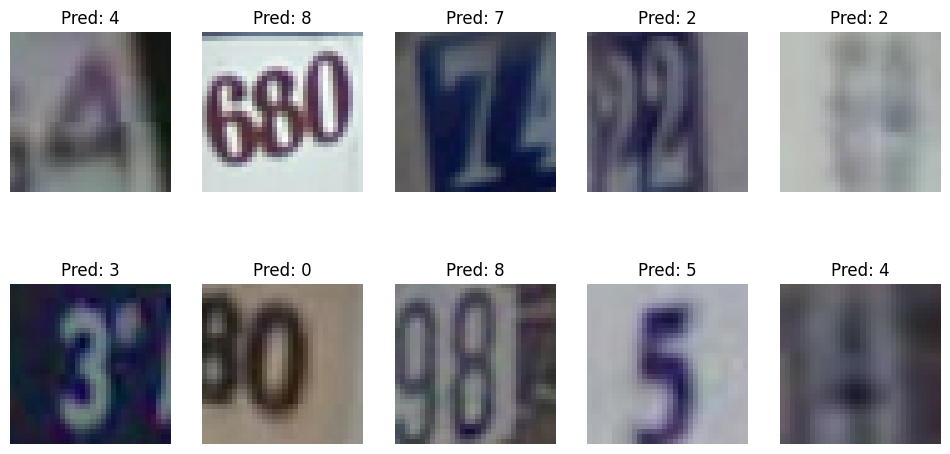

In [50]:
plt.figure(figsize = (12,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    images[i] = images[i].numpy()
    plt.imshow(images[i].reshape(32, 32, 3))
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis("off")

plt.show()